## Linear Regression

 - Linear Regression is a supervised Machinne Learning that we used to predict the <b>continuous data.</b>
    
<b><font size='4'>In order to build the model we need : </font></b>
  1. Descret & Continuous variable
  2. best fit line
  3. Continuous dependent variable
  
<b>The equation of linear regression is : </b><br>
<br>
<center>$Y = mx + c$</center>

### Problem Statement : 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [3]:
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# here, i need to predict sales on the bases of features.

Q.What are the <b>features?<br></b>
 - TV<br>
 - radio<br>
 - newspaper<br>
    
Q.What is the <b>response?<br></b>
 - sales

In [5]:
# check how big is my data
data.shape

(200, 5)

In [6]:
# I want to know the information of my dataset
data.info()  #print summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
# finding the missing values from each column of my dataset
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<b> Now, lets showcase the relationship bet feature & target column</b>
1. TV vs sales<br>
2. radio vs sales<br>
3. newspaper vs sales<br>

<I>Check which feature gives the majority sales</I>

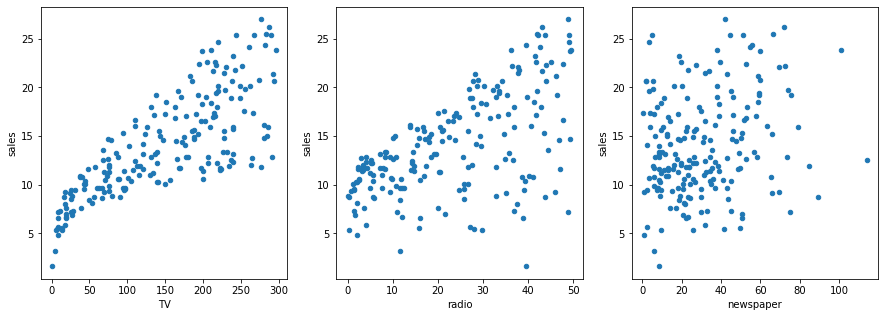

In [8]:
fig,axs = plt.subplots(1,3) #fig is used to save data

data.plot(kind='scatter',x='TV',y='sales',figsize=(15,5),ax=axs[0]) #axs[0] = first column
data.plot(kind='scatter',x='radio',y='sales',figsize=(15,5),ax=axs[1])
data.plot(kind='scatter',x='newspaper',y='sales',figsize=(15,5),ax=axs[2])
fig.savefig('test-data.jpg')

<b>My Analysis is : </b><br>
<I> The relationship between TV vs sales & radio vs sales seems increase in the sales.But,
The relationship between newspaper & sales dosen't look good, it seems like investing in newspaper advertisement is waste of money
but I can't relay on one proof, I've to check other available options as well.Because the client is investing millions,so as an engineer
have to check all possibilities and then give a surity.<I>

## Questions about the data : 
A generic question shall be : How the company should optimize the spends on advertising, to maximize the sales?<br>
> <b>This generic question might lead you to specific questions : <br></b>
        1.What's the relationship between ads & sales?<br>
        2.How prominent is that realtionship?<br>
        3.Which ad type contribute to sales?<br>
        4.How each ad contributes to sales?<br>
        5.Can sales be predicted based on the expense of the advertisement?<br>

We'll explore questions below : 

<b>From the relationship diagram above.It seems the realtionship between TV,radio ads with sales is typically looks like this :

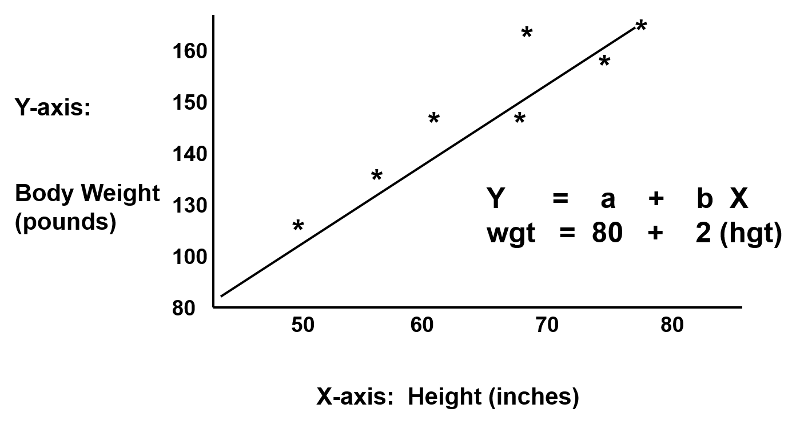

In [9]:
from IPython.display import Image
Image("SimpleLinearRegression.png",width=500,height=500)

Hence, we can build a model using linear regression algorithm.

## Simple Linear Regression <br>
> - Simple Linear Regression is called as predicting a quantitative response(lable) on the bases of single feature.<br>
> - The mathematical expression of SLR : <br>
<center>$Y = mx + c$ </center><br>

Where : <br>
 - m is coefficient of x
 - c is intercept
 - x is the feature
 - y is the response or target variable<br>

#### 2. Best Fit Line<br>
 - From the above distribution we are able to draw a best fit line. <br>
 - How it is calculated?<br>
     - Difference between the actual point & predicted point is called as <b>Residual.</b><br>

We'll discuss this in detail.

<b>Que : How do you know, this is the best fit line?</b>

The best fit line is btained by minimizing the residual.Residual is the distance between actual Y & predicted Y shown as below:

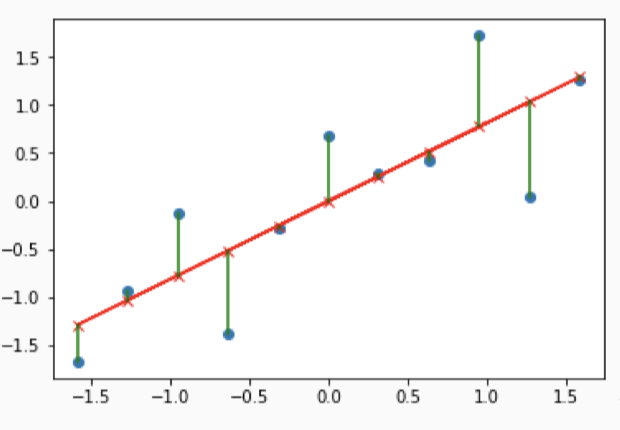

In [10]:
from IPython.display import Image
Image("Residual.png",width=400,height=300)

Mathimatically, <b>Residual</b> is: <center>$r = Y - (mx + c)$</center>

hence, the sum of <b>square of residual</b> is : <br>

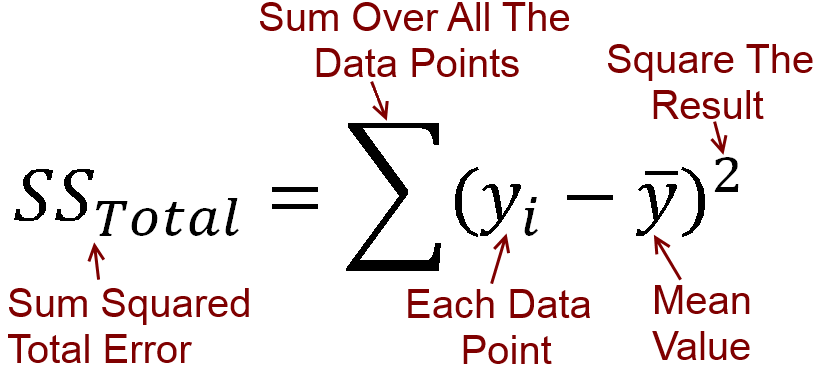

In [11]:
from IPython.display import Image
Image("Residual-formula.png",width=300,height=300)

<img src="Residual-formula.png" height="250" width="300"/>   

<img src="rss.png" height=250, width=300/>

## Gradient Descent

 - GD works behind the scene, it trains a model in such a way where it always tries to reach global minima.
 - learning rate
 - See the handwritten notes,explianed in detail

<img src="Gradient Descent.gif" width="300" height="300"/>

### Building my 1st Model<br>
 - Simple Linear Regression

In [12]:
x = data[['TV']]
y = data.sales

from sklearn.linear_model import LinearRegression  #all libraries are case sensitive

lm = LinearRegression()

lm.fit(x,y)

LinearRegression()

In [13]:
#print intercept and coefficient

print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


### Prediction using the model<br>

If the expense on TV ad is 50,000 rupee,what will be the sales prediction for that market?<br>
<center>$Y = mx + c$<br>
Y = 0.04753664 * 50 + 7.032593549127693</center>

In [14]:
# calculate the prediction
7.032593549127693 + 0.04753664 * 50

9.409425549127693

In [15]:
# this is suppose to be my prediction, lets check.

In [16]:
# let's do it by code : 

import pandas as pd

x_new = pd.DataFrame({'TV' : [50]})

lm.predict(x_new)

array([9.40942557])

In [17]:
# hence, got the same number which we predicted, it means model is working perfectly fine.

## Plotting a least squared line

Here, how the line is being drawn.let's see how

In [18]:
# Create a DataFrame with the min & max value 

x_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
x_new

,TV
0,0.7
1,296.4


In [19]:
# predict the sales for min & max. and store them
preds = lm.predict(x_new)
preds

array([ 7.0658692 , 21.12245377])

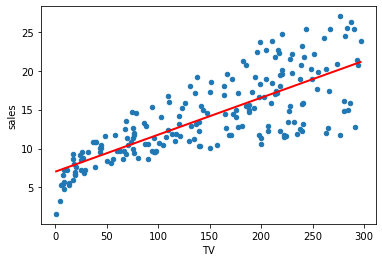

In [20]:
# plot the predict data

data.plot(kind='scatter', x='TV', y='sales')

# then, plot the least square line
plt.plot(x_new, preds, c='red', linewidth=2)

## Model confidence

#### How can I trust the model that the model is bulit is accurate by performance?Who is going to tell me that model is right?

<b>Question : Is linear regression high bias/low varience or low bias/high varience model?</b><br>
<b>Answer:</b> explain with example <b>exp, loc,tech.</b> Here, my model is giving high importance to only exp n less imp to loc n tech, it means its a high bias.With the same, if exp increses from 3.0 to 5.0 the salary will reflect it means its high varience.<br>
hence, the Linear regession is a <b>high bias/low varience model.</b>

In [21]:
# Now, let's try to fit our model.

import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV',data=data).fit()
lm.conf_int()  #confidence interval

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


### Hypothesis Testing and p_values

 - <b>Null Hypothesis</b>:It says, there is no relationship exit between features and lable.
 - <b>Alternative Hypothesis</b>:It says, there always be a realtionship exit between features and lable.<br>
How do I conclude that there is a relation or not that's why the p_values comes into pitchure and if there is actually a relatioship between features and lable then nees to test it.That's why testing comes in pitchure. Hence, we have to go through the hypothesis testing and get the p-value.

In [22]:
# print the p_values.

lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

p_value < 0.05 it means, we reject null hypothesis. Therefore, we are successful to prove the altenative hypothesis. 

## $R^2$ Statistics


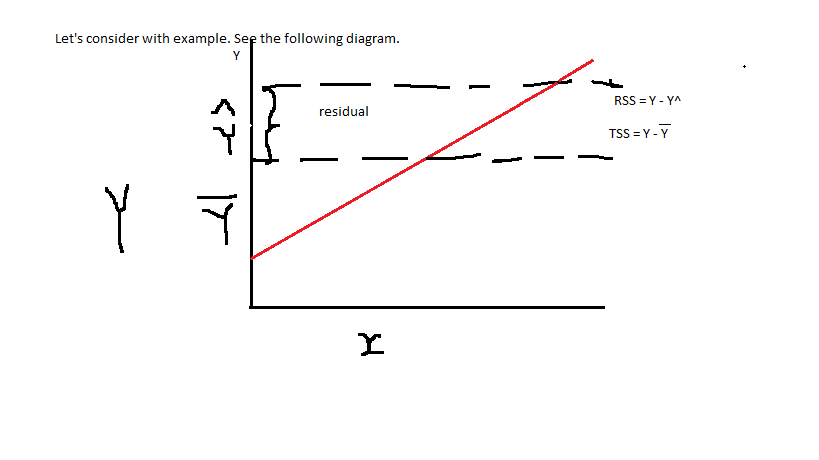

we need to square them to avoid negativity. That will give a model confidence. It is always between 0-1 when we are using simple linear regression.But, there is a chance that r square will hit 1 or >1 in multiple linear regression, in that case we'll use adjusted r square statistics.<br>

If we use r square for multiple linear regression then if i keep adding features then r square will reach at 1 wjich means at 100% or >100% which is not possible so to balance this we use adjusted r square.

## Adjusted $R^2$ Statistics

Formula for Adjusted $R^2$ Statistics as follows : 

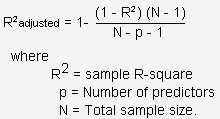

In [23]:
# print the R square value for the model.
lm = smf.ols(formula='sales ~ TV',data=data).fit()
lm.rsquared

0.611875050850071

## Multiple linear Regression

In [24]:
# Create x and y

x = data[['TV','radio','newspaper']]
y = data.sales

lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [25]:
print('Intercept   =>',lm.intercept_)
print('Coef_TV     =>',lm.coef_[0])
print('Coef_radio  =>',lm.coef_[1])
print('Coef_np     =>',lm.coef_[2])

Intercept   => 2.9388893694594067
Coef_TV     => 0.04576464545539761
Coef_radio  => 0.18853001691820462
Coef_np     => -0.0010374930424762972


It shows investing in newspaper is waste of money.This is one of the proof.But we dont depend on just only one proof we'll check more.

In [26]:
lm = smf.ols(formula = 'sales ~ TV+radio+newspaper',data=data).fit() #ordinal least squared methods
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           1.58e-96
Time:                        10:43:30   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Hence we failed to reject null hypothesis for newspaper

In [27]:
# going to check for 2 feature n then 3 feature

lm = smf.ols(formula='sales ~ TV+radio',data=data).fit()
lm.rsquared

0.8971942610828957

In [28]:
lm = smf.ols(formula='sales ~ TV+radio+newspaper',data=data).fit()
lm.rsquared

0.8972106381789522

We've one more method to get model confidence which is adjusted rsquared.